In [1]:
# Do not make any changes in this cell
# Simply execute it and move on

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
ans = [0]*8

In [2]:
# The exercise uses Boston housing dataset which is an inbuilt dataset of scikit learn.
# Run the cell below to import and get the information about the data.

# Do not make any changes in this cell.
# Simply execute it and move on

from sklearn.datasets import load_boston
boston=load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [3]:
# Creating a dataframe

# Do not make any changes in this cell
# Simply execute it and move on

boston_df=pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.DataFrame(boston['target'])
boston_df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
# Question 1: Find the mean of the "target" values in the dataframe (boston_df)  
#             Assign the answer to ans[0] 
#             eg. ans[0] = 24.976534890123 (if mean obtained = 24.976534890123)

In [5]:
# Your Code: Enter your Code below
mean_target=boston_df.target.mean()
mean_target

22.532806324110698

In [6]:
#1 mark
ans[0] = mean_target

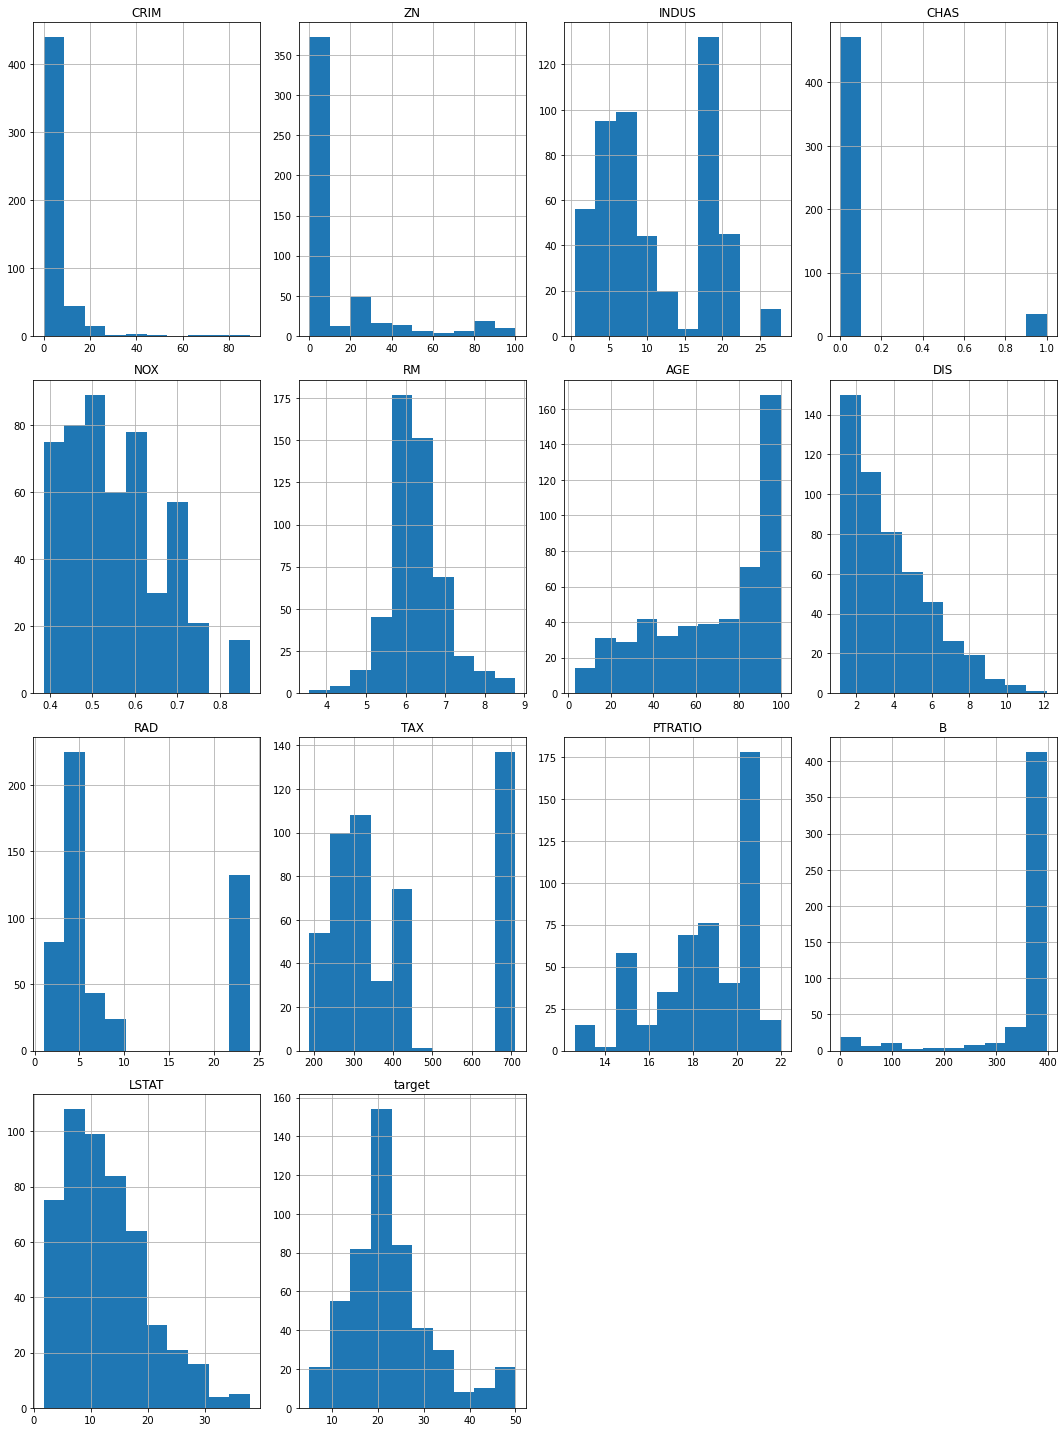

In [7]:
# Just to get a look into distribution of data into datasets
# Plot a histogram for boston_df

hist = boston_df.hist(figsize=(15,20))
plt.tight_layout()
plt.show()


**Splitting the data using train_test_split from sklearn library**

In [8]:
# Import machine learning libraries  for train_test_split

from sklearn.model_selection import train_test_split

# Split the data into X and Y
X=boston_df.drop(columns=['target'])
Y=boston_df['target']

# Spliting our data further into train and test (train-90% and test-10%)
# Use (randon_state = 42) in train_test_split, so that your answer can be evaluated
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 13), (51, 13), (455,), (51,))

**LINEAR REGRESSION**

In [9]:
# Question 2: Find mean squared error on the test set and the linear regression intercept(b)  
#             Assign the answer to ans[0] in the form of a list 
#             eg. ans[1] = [78.456398468,34.276498234098] 
#                  here , mean squared error             = 78.456398468
#                         linear regression intercept(b) = 34.276498234098


In [10]:
# Fit a linear regression model on the above training data and find MSE over the test set.
# Your Code: Enter your Code below
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR=LinearRegression()
LR.fit(X_train,y_train)
intercept=LR.intercept_

pred=LR.predict(X_test)
mse=mean_squared_error(y_test,pred)

mse,intercept

(14.995852876582997, 36.73146277462431)

In [11]:
# 2 marks
ans[1] = [mse,intercept]

**RIDGE REGRESSION**

In [12]:
# Question 3: For what value of lambda (alpha)(in the list[0.5,1,5,10,50,100]) will we have least 
#             value of the mean squared error of testing set 
#             Take lambda (alpha) values as specified i.e. [0.5,1,5,10,50,100]
#             Assign the answer to ans[2]  
#             eg. ans[1] = 5  (if  lambda(alpha)=5)


In [13]:
# Your Code: Enter your Code below
from sklearn.linear_model import Ridge
min_mse=1000
r=[]
alphas=[0.5,1,5,10,50,100]

for i,l in enumerate(alphas):
  r.append(Ridge(alpha=l))
  r[i].fit(X_train,y_train)
  pred=r[i].predict(X_test)
  mse=mean_squared_error(y_test,pred)
  print(l,'       ',mse)
  if mse<min_mse:
    min_alpha=l
    min_mse=mse

0.5         14.809385226585533
1         14.775452511215363
5         14.958292845779404
10         15.137383143915951
50         15.97791060718165
100         16.679653748490615


In [14]:
#1 mark
ans[2] = min_alpha

In [15]:
# Question 4: Find mean squared error on the test set and the Ridge regression intercept(b)
#             Use the lamba(alpha) value obtained from question-3 
#             Assign the answer to ans[3] in the form of a list 
#             eg. ans[3] = [45.456398468,143.276498234098] 
#                  here , mean squared error             = 45.456398468
#                         Ridge regression intercept(b) = 143.276498234098


In [16]:
# Your Code: Enter your Code below
r_1=Ridge(alpha=min_alpha)
r_1.fit(X_train,y_train)
intercept=r_1.intercept_

pred=r_1.predict(X_test)
mse=mean_squared_error(y_test,pred)

mse,intercept

(14.775452511215363, 31.465535305976168)

In [17]:
# 2 marks
ans[3] = [mse,intercept]

In [18]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

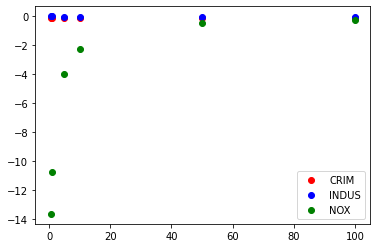

In [19]:
# Plot the coefficient of the features( CRIM , INDUS , NOX ) with respective to  
# the lambda values specified [0.5,1,5,10,50,100]
# Enter your code below
coef_0=[r[i].coef_[0] for i in range(len(r))]
coef_2=[r[i].coef_[2] for i in range(len(r))]
coef_4=[r[i].coef_[4] for i in range(len(r))]

plt.scatter(x=alphas,y=coef_0,c='r')
plt.scatter(x=alphas,y=coef_2,c='b')
plt.scatter(x=alphas,y=coef_4,c='g')
plt.legend([ 'CRIM' , 'INDUS' , 'NOX'])

plt.show()

**LASSO REGRESSION**

In [20]:
# Question 5: For lambda (alpha)=1 find the lasso regression intercept and the test set mean squared error
#             Assign the answer to ans[4] in the form of a list 
#             eg. ans[4] = [35.456398468,14.276498234098] 
#                  here , mean squared error             = 35.456398468
#                         lasso regression intercept(b) = 14.276498234098


In [21]:
# Your Code: Enter your Code below
from sklearn.linear_model import Lasso

l_1=Lasso(alpha=1)
l_1.fit(X_train,y_train)
intercept=l_1.intercept_

pred=l_1.predict(X_test)
mse=mean_squared_error(y_test,pred)

mse,intercept

(18.645326946116253, 40.548594587442295)

In [22]:
#2 mark
ans[4] = [mse,intercept]

In [23]:
# Question 6: Find the most  important feature  in the data set i.e. which feature 
#             coefficient is further most non zero if lambda is increased gradually
#             let CRIM=1,	ZN=2, INDUS=3,	CHAS=4,	NOX=5,	RM=6,	AGE=7,	DIS=8,	
#             RAD=9,	TAX=10,	PTRATIO=11,	B=12,	LSTAT=13
#              eg. if your answer is "CHAS"
#                   then your answer should be ans[5]=4

In [24]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [25]:
# Your Code: Enter your Code below
imp_feature=l_1.coef_.argmax()+1

In [26]:
#2 marks
ans[5] = imp_feature

Run the below cell only once u complete answering all the above answers 


In [27]:
##do not change this code
import json
ans = [str(item) for item in ans]

filename = "mansinumber1@gmail.com_Mansi_Uniyal_LinearRegression"

# Eg if your name is Saurav Joshi and email id is sauravjoshi123@gmail.com, filename becomes
# filename = sauravjoshi123@gmail.com_Saurav_Joshi_LinearRegression

## Do not change anything below!!
- Make sure you have changed the above variable "filename" with the correct value. Do not change anything below!!

In [29]:
from importlib import import_module
import os
from pprint import pprint

findScore = import_module('findScore')
response = findScore.main(ans)
response['details'] = filename
with open(f'evaluation_{filename}.json', 'w') as outfile:
    json.dump(response, outfile)
pprint(response)

{'Comments': 'Please make sure the Python script you are submitting is not '
             'having errors. Try running before submitting',
 'Message': 'Successfully submitted! Thanks for taking the exercise',
 'details': 'mansinumber1@gmail.com_Mansi_Uniyal_LinearRegression',
 'status': 'Success'}
